In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly
from plotly.graph_objs import *
import networkx as nx
import plotly.graph_objs as go
import networkx as nx

In [2]:
# Import bibliometrics data in python
c1 = pd.read_excel('c1.xlsx')

In [5]:
#Download the codes of coluns in database Web of Science and replace with full labels
def colunas(dataframe):
    page = requests.get("https://images.webofknowledge.com/images/help/WOS/hs_wos_fieldtags.html")
    soup = BeautifulSoup(page.content, 'html.parser')
    cod = soup.find('td').find_all('strong')
    trad = soup.find('td').find_all('p')
    traducao = [tr.get_text() for tr in trad]
    codigo = [c.get_text() for c in cod]
    del traducao[0]
    index = dataframe.columns
    nc = []
    for x in index:
        nc.append(traducao[codigo.index(x)])
    dataframe.columns = nc
    return dataframe

In [6]:
c1novo = colunas(c1)

In [8]:
#Create new dataframe for list all cods of publication and authors in rows 
i = 0
autores = pd.DataFrame()
for index, row in c1.iterrows():    
    if(';' in row['Authors']):    
        for x in row['Authors'].split(';'):            
            autores= autores.append(pd.DataFrame({'Codigo': i, 'Titulo': row['Document Title'], 'Autores': x}, index=[0]), ignore_index=True, sort=False)            
    else:
        autores= autores.append(pd.DataFrame({'Codigo': i, 'Titulo': row['Document Title'], 'Autores': row['Authors']}, index=[0]), ignore_index=True, sort=False)                
    i = i + 1

In [9]:
# This section convert simple table data in pivot table, similar of excel. More information https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
pivottable = pd.pivot_table(autores, values='Titulo', index=['Autores'], columns=['Codigo'],aggfunc=np.count_nonzero, fill_value=0)

In [11]:
piv = pivottable.dot(pivottable.T)

In [13]:
# https://www.kaggle.com/tianyiwang/neighborhood-interaction-with-network-graph
# https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [14]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

df = pd.DataFrame(piv.sum())

for x in range(len(piv.values)):
#     print(piv.values[x][x])   
    G.add_node(x, weight=df.iloc[x])
for autores in range(len(piv.values)):    
    for x in range(len(piv.values)):
        if(piv.values[autores][x] >= 1):
            G.add_edge(autores,x, weight=2)
# Add a node

# Add edges 
G.add_edge(1,5)

# e = (2,3)
# G.add_edge(*e) # * unpacks the tuple


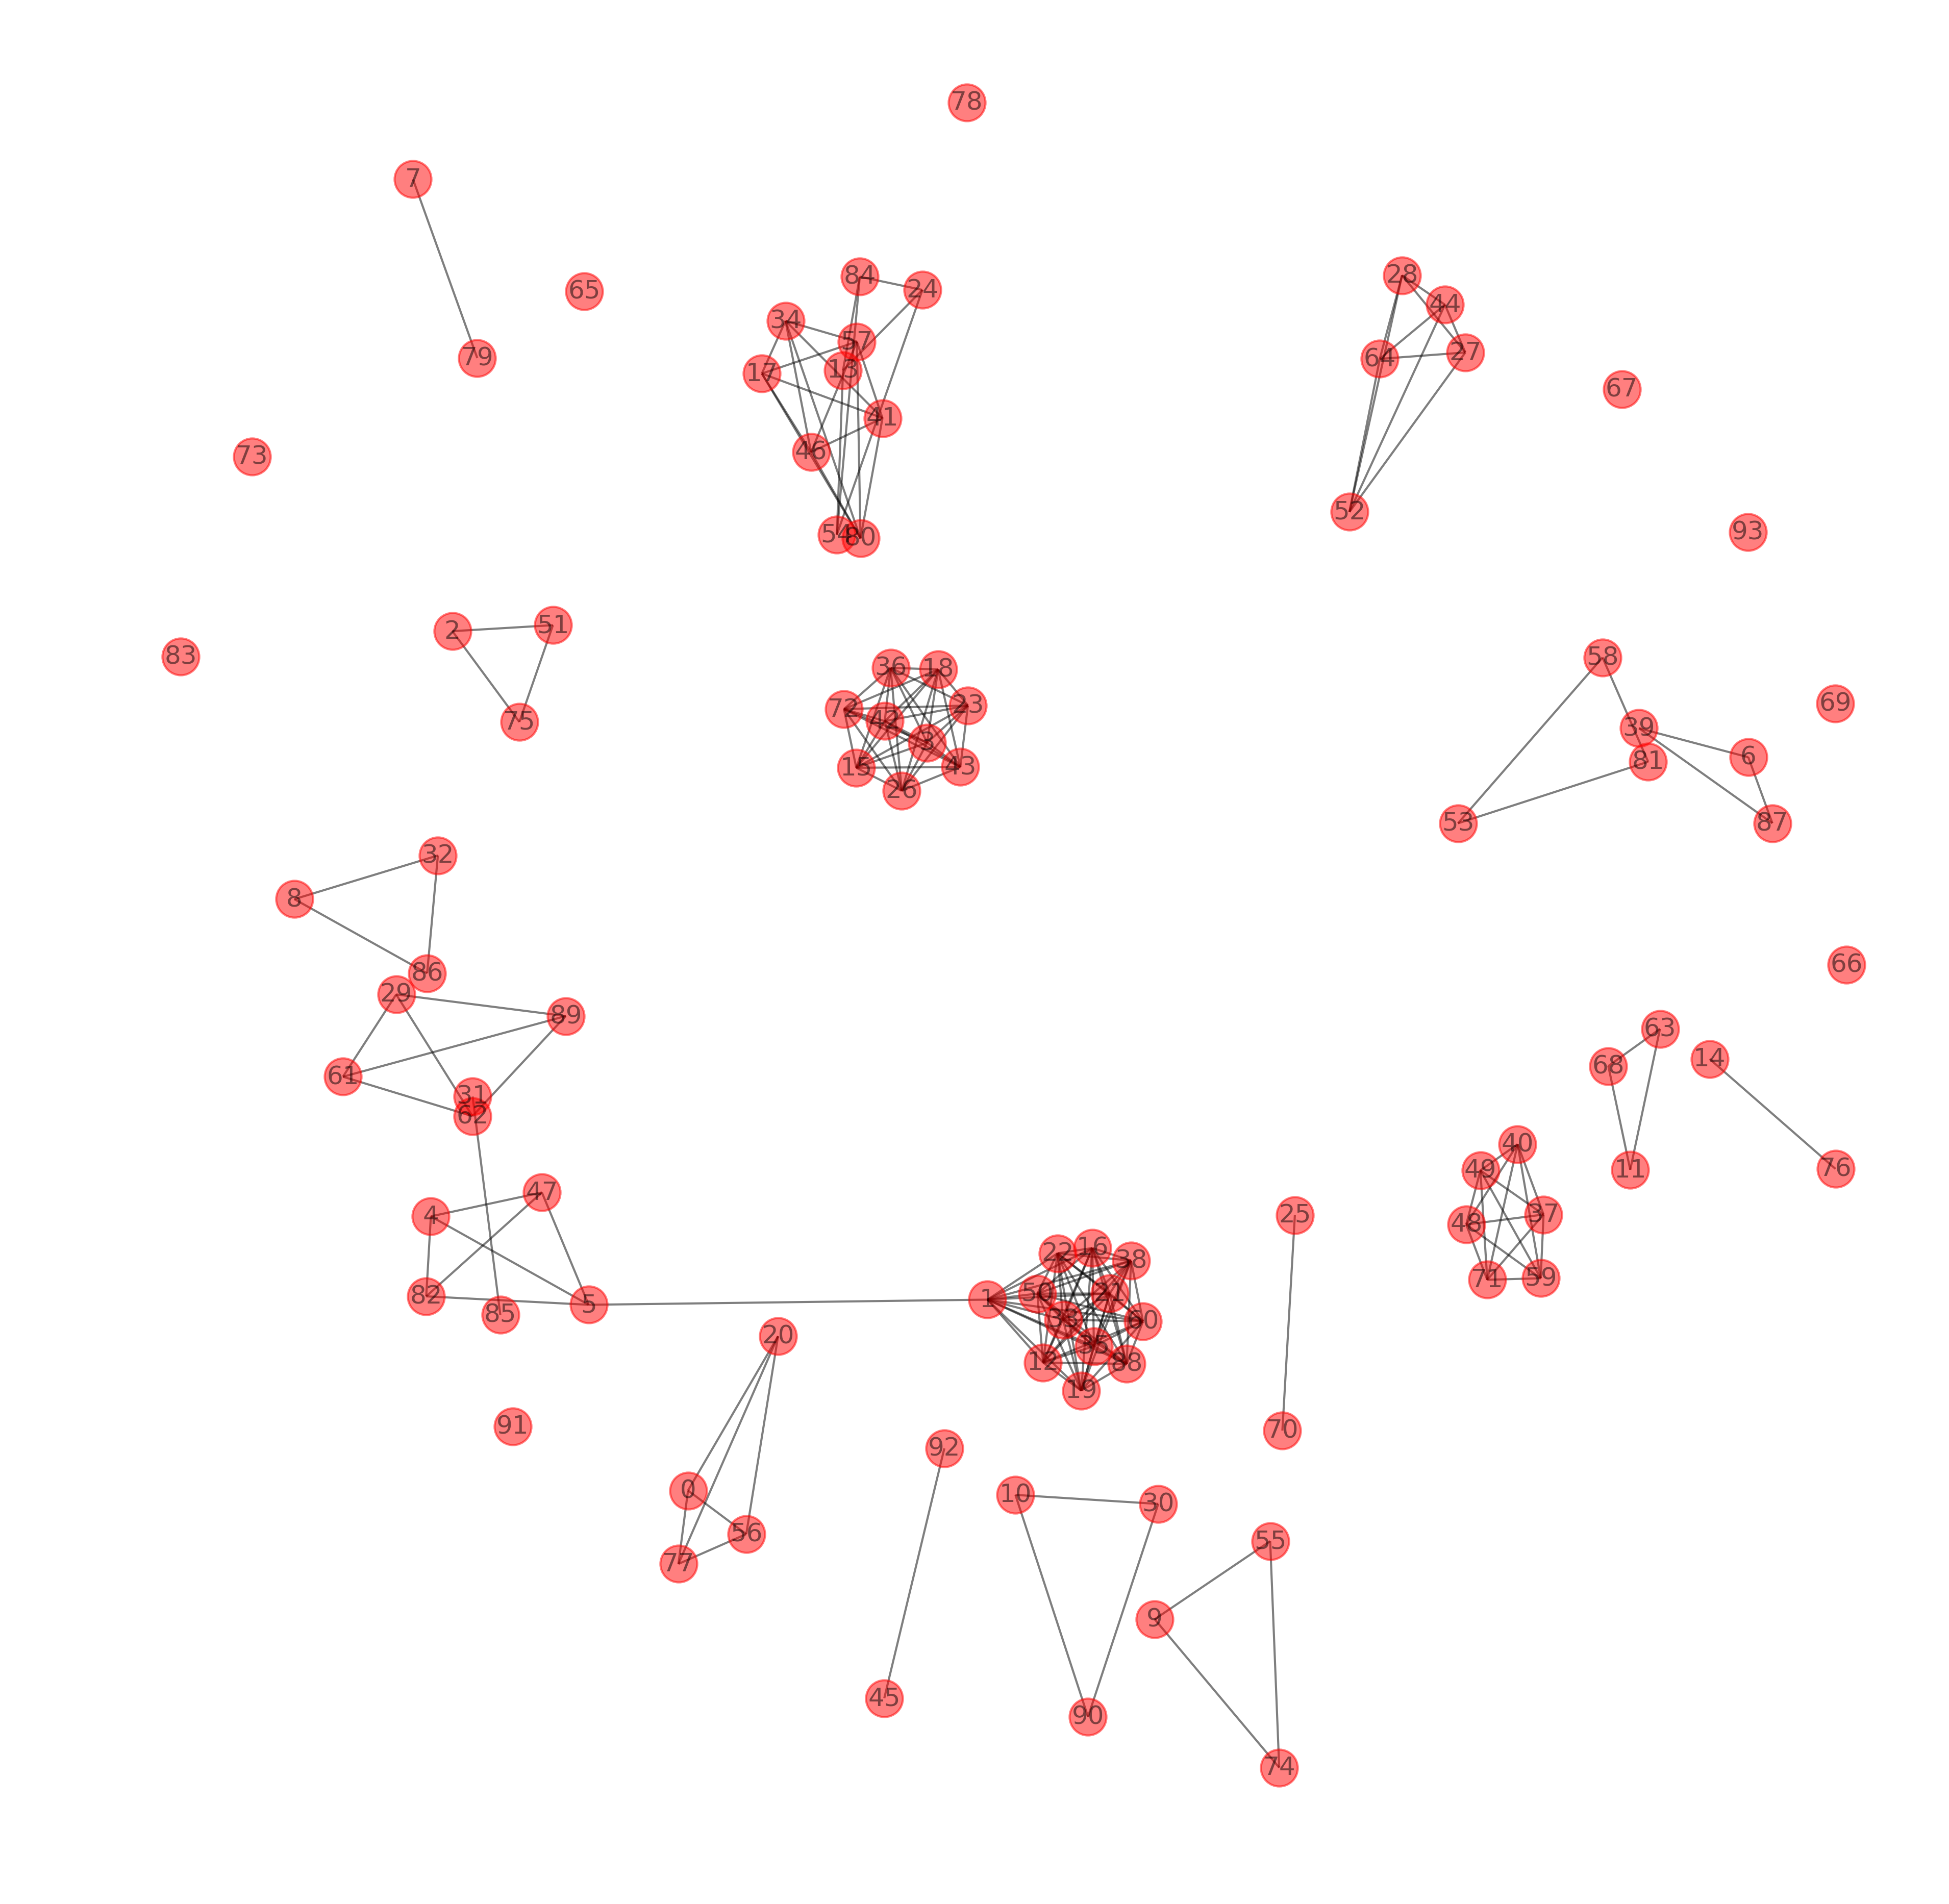

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12), dpi=300, facecolor='w', edgecolor='k')

pos = nx.spring_layout(G, k=0.2, iterations=20)

nx.draw(G,with_labels=True, alpha = 0.5, pos=pos)

In [80]:
import pygraphviz as pgv
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'


ModuleNotFoundError: No module named 'pygraphviz'